In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import recov.censi
import recov.registration_algorithm

import recova.clustering
import recova.covariance
import recova.registration_result_database

np.set_printoptions(precision=3, linewidth=100)

In [3]:
db = recova.registration_result_database.RegistrationPairDatabase('/home/dlandry/dataset/db_eth_05/')

clustering = recova.clustering.DensityThresholdClusteringAlgorithm(k=18, threshold=1e5)
cov_algo = recova.covariance.SamplingCovarianceComputationAlgorithm(clustering)

In [51]:
pair = db.get_registration_pair('plain', 16, 14)
ref_cov = cov_algo.compute(pair)

1
Returning early


In [52]:
cov

array([[ 6.524e-07, -2.798e-08, -2.317e-07, -1.227e-09,  9.646e-08,  4.864e-08],
       [-2.798e-08,  4.099e-07,  1.909e-08, -1.253e-07, -6.489e-09, -1.404e-07],
       [-2.317e-07,  1.909e-08,  7.059e-07, -4.137e-08,  1.502e-07,  5.028e-09],
       [-1.227e-09, -1.253e-07, -4.137e-08,  1.716e-07,  9.194e-09, -2.071e-08],
       [ 9.646e-08, -6.489e-09,  1.502e-07,  9.194e-09,  1.793e-07,  8.619e-10],
       [ 4.864e-08, -1.404e-07,  5.028e-09, -2.071e-08,  8.619e-10,  1.591e-07]])

In [53]:
icp_algo = recov.registration_algorithm.IcpAlgorithm()

noise_levels = np.linspace(0.0, 0.1, 6)
censi_covariances = np.empty((len(noise_levels), 6, 6))
for i, level in enumerate(noise_levels):
    censi_covariances[i] = recov.censi.censi_estimate_from_points(pair.points_of_reading(), pair.points_of_reference(), pair.transform(), icp_algo, sensor_noise_std=level)

censi_estimate -reading /tmp/a989b2fb-1195-47dd-b612-29f3dbe97199.qpc -reference /tmp/e5349deb-af42-4222-8dfb-b9081596b64a.qpc -ground_truth '[[0.8380851034017177, 0.5451598205011418, 0.020393518416864438, 1.5120141307946344], [-0.540253336449096, 0.834572878317487, -0.10776773374811784, -0.47105651154902184], [-0.07576967772890773, 0.07930011090821552, 0.9939675418636368, 0.2167791583467187], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDataPoin

{'covariance': [[4.25346692043168e-07, 7.99776288440026e-08, 4.90495257373737e-08, 1.01353231514732e-08, -5.38193187744196e-09, -6.47178687943509e-08], [7.99776288440026e-08, 4.96347999763475e-07, 3.77819510503039e-08, 2.2792906823682e-08, -1.92256043237625e-09, -1.1381488293832e-08], [4.90495257373737e-08, 3.77819510503039e-08, 5.33644424438714e-08, 9.77604500283499e-09, 1.46398184401449e-08, -7.8234867128723e-09], [1.01353231514732e-08, 2.2792906823682e-08, 9.77604500283499e-09, 5.26242615195773e-09, 2.5752718113818e-09, -1.91483736655966e-09], [-5.38193187744196e-09, -1.92256043237625e-09, 1.46398184401449e-08, 2.5752718113818e-09, 9.37918979006592e-09, -6.78992671747372e-11], [-6.47178687943509e-08, -1.1381488293832e-08, -7.8234867128723e-09, -1.91483736655966e-09, -6.78992671747372e-11, 2.01133233989518e-08]], 'transform': [[0.835246004490323, 0.549452788611063, 0.0216219265051215, 1.52882057273926], [-0.544344651430747, 0.831764845353654, -0.108883379468926, -0.488085429179807], 

In [54]:
print(np.trace(ref_cov))

0.026378300025084574


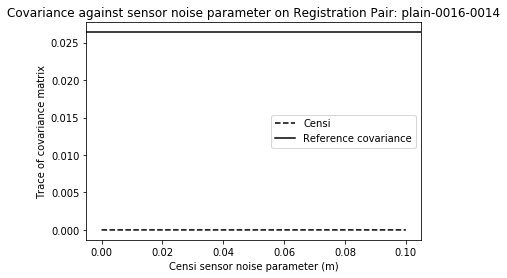

In [55]:
plt.plot(noise_levels, [np.trace(x) for x in censi_covariances], color='black', linestyle='dashed', label='Censi')
plt.axhline(y=np.trace(ref_cov), color='black', label='Reference covariance')
plt.title('Covariance against sensor noise parameter on {}'.format(str(pair)))
plt.xlabel('Censi sensor noise parameter (m)')
plt.ylabel('Trace of covariance matrix')
plt.legend()
plt.show()